# Quantum Galton Boards: Level 1-4 Implementation

### Overview

This notebook presents a systematic construction of **Quantum Galton Boards** (QGB) for levels 1 through 4. Through this progressive implementation, we explore the underlying patterns and develop insights toward generalizing the construction for an arbitrary n-level Quantum Galton Board.

Our implementation follows the theoretical framework outlined in [this research paper](https://arxiv.org/abs/2202.01735). The quantum version of the classical Galton board demonstrates fascinating quantum mechanical phenomena including superposition and interference effects for generating quantum states with certain interesting distributions.

### Objectives

- 🎯 **Construct** individual Quantum Galton Boards for levels 1-4
- 🔍 **Analyze** the quantum circuits and their behavior
- 🧮 **Identify** patterns for n-level generalization
- 📊 **Visualize** quantum probability distributions

---

In [1]:
import qiskit
from qiskit import *
from qiskit.circuit.library import HGate, RYGate, RXGate, XGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1 Level QGB: Single Quantum Peg

A Level 1 Quantum Galton Board demonstrates the fundamental quantum peg operation using a single quantum peg that routes a ball to either left or right output positions through quantum superposition.

### Circuit Architecture (for representing action of one peg on one ball)
- **4 qubits total**: 3 working qubits ($q_1, q_2, q_3$) + 1 control qubit  ($q_0$)
- **Qubit roles**:
  - $q_0$: Control qubit (enables quantum routing)
  - $q_1$: Left output position  
  - $q_2$: Center position (ball input)
  - $q_3$: Right output position

![QuantumPeg](Images/Peg.png)


### Final Quantum State
$$ |\psi\rangle = \frac{|0011⟩ + |1001⟩}{\sqrt{2}}$$

**Physical interpretation**: Ball exists in equal superposition at both output positions ($q_1 and q_3$), demonstrating quantum parallelism in the routing process.

The control qubit architecture would enable scalable replication for multi-level boards. 

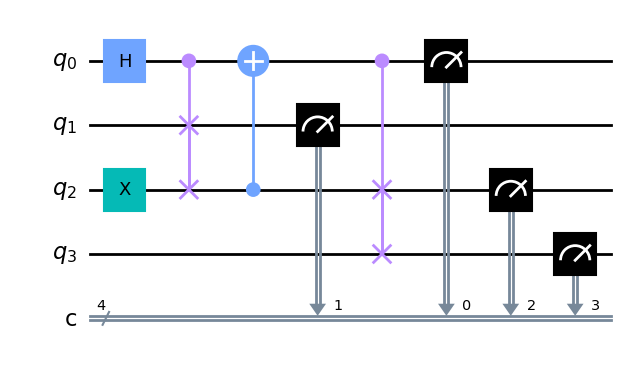

Measurement results (bitstrings):
1001 : 5072
0011 : 4928


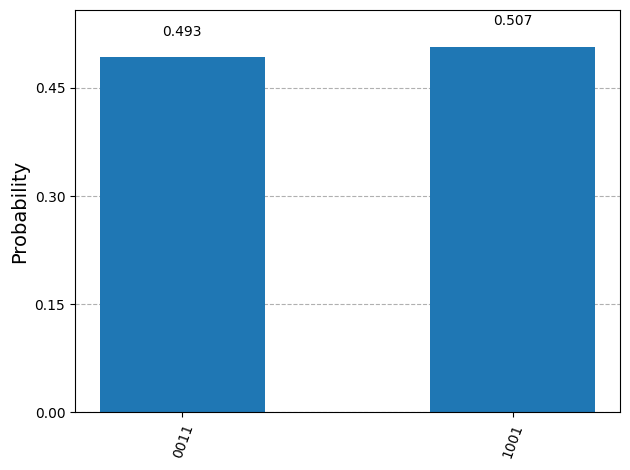

In [2]:
q= QuantumRegister(4, 'q')
c= ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

# Construction of peg. 
qc.h(q[0])
qc.x(q[2]) # The ball
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])


for i in range(0, 4):
    qc.measure(q[i], c[i])

qc.draw(output='mpl', style='clifford') 
plt.show()

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

total_shots = sum(counts.values())
probabilities = {state: count/total_shots for state, count in counts.items()}
plot_histogram(probabilities)
plt.ylabel('Probability')
plt.show()


### Note: All the bits in the outcome samples are not different. Only the bits at the $0^{th}$ and $2^{nd}$ position (repesenting the two possible output positions of the ball) differ. Thus, measuring just these two qubits is sufficient to capture the complete statistical behavior of the one level quantum peg system. We take this insight while constructing higher level boards.

___

## 2 level QGB: Three Quantum Pegs

Here there a 3 quantum pegs arranged in 2 levels and hence three possible final positions for the ball (as shown).

<img src="Images/3Peg.png" alt="3Pegg" height="300">

Its straightforward to extend the 1 Peg case shown above. After each level, the control qubit is reset and outputs of a peg would be taken to new registers.

The circuit diagram below shows the complete 6-qubit implementation. 

<img src="Images/3PegQC.png" alt="3Pegg" height="300">



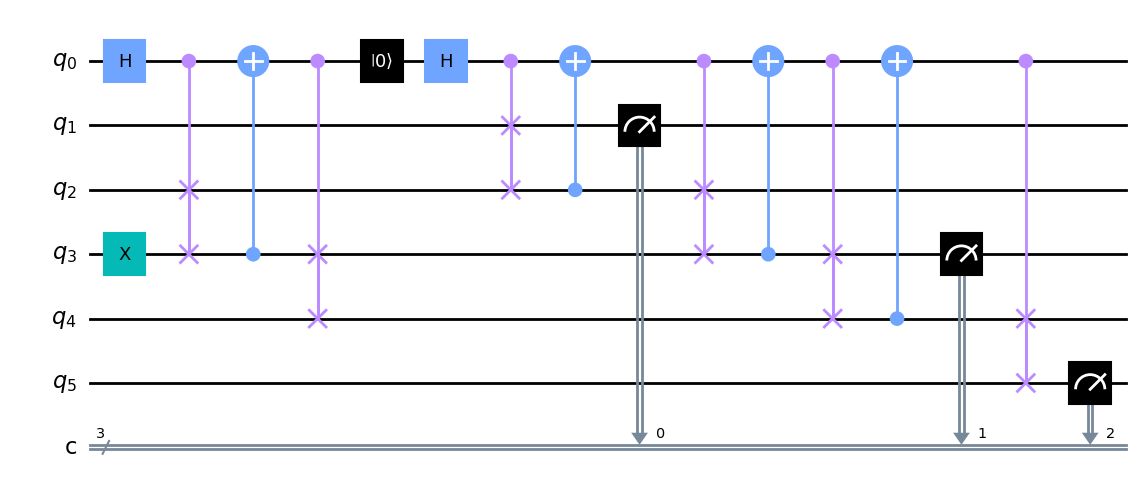

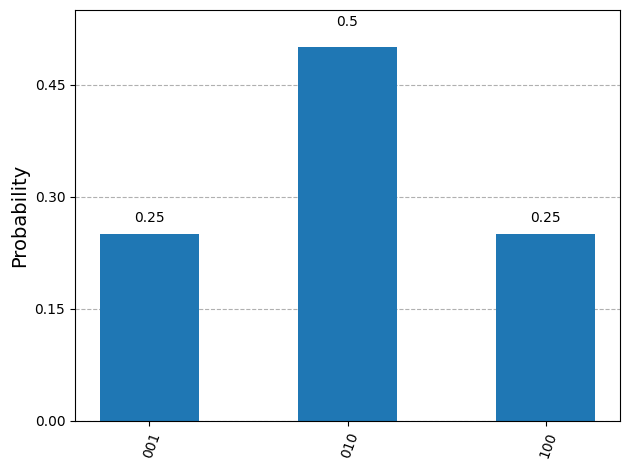

In [3]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(3, 'c') # number of registers equals k+1 where k is the number of pegs in last level
qc = QuantumCircuit(q, c)


qc.x(q[3])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])


for i in range(0,3):
    qc.measure(q[2*i +1], c[i])

qc.draw(output='mpl', style='clifford') 
plt.show()

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
total_shots = sum(counts.values())
probabilities = {state: count/total_shots for state, count in counts.items()}
plot_histogram(probabilities)
plt.ylabel('Probability')
plt.show()




## 3 level QGB: 6 Pegs and 4 level QGB: 10 Pegs

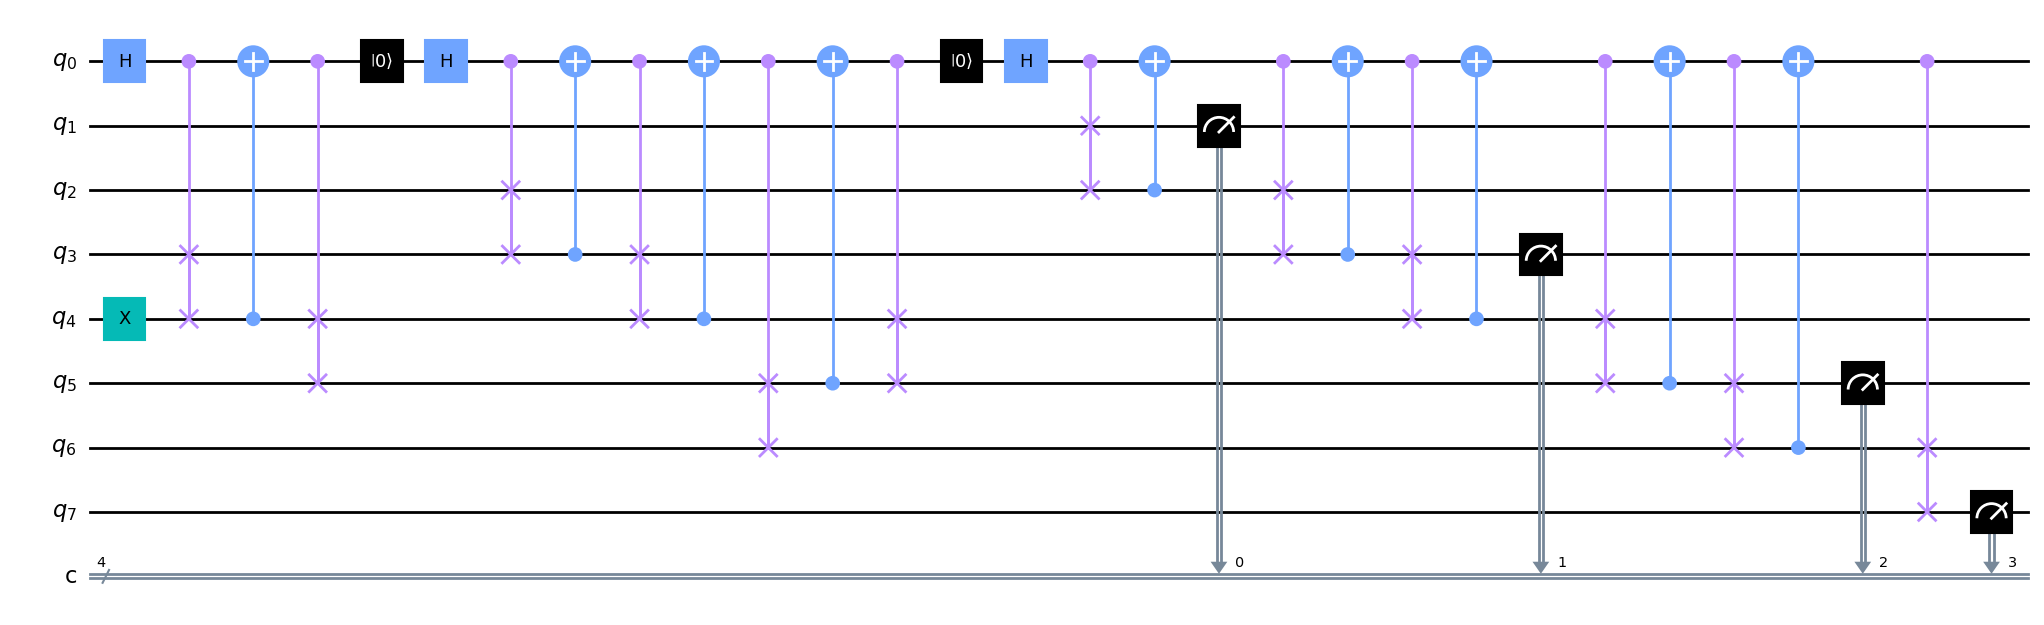

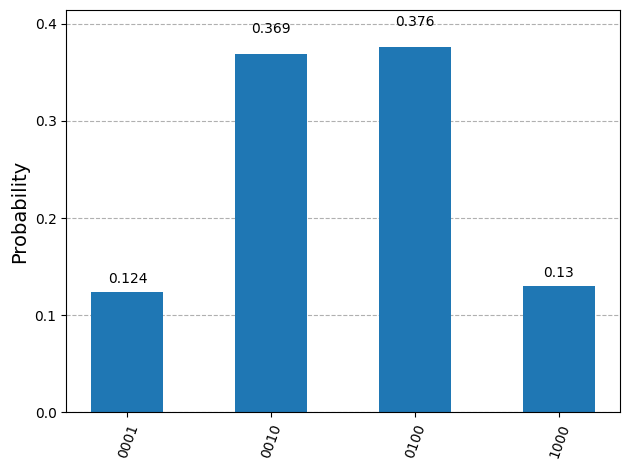

In [4]:
q = QuantumRegister(8, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[4])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[4], q[5])


qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])

for i in range(0,4):
    qc.measure(q[2*i + 1], c[i])

qc.draw(output='mpl', style='clifford', fold=-1) 
plt.show()

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

total_shots = sum(counts.values())
probabilities = {state: count/total_shots for state, count in counts.items()}
plot_histogram(probabilities)
plt.ylabel('Probability')
plt.show()



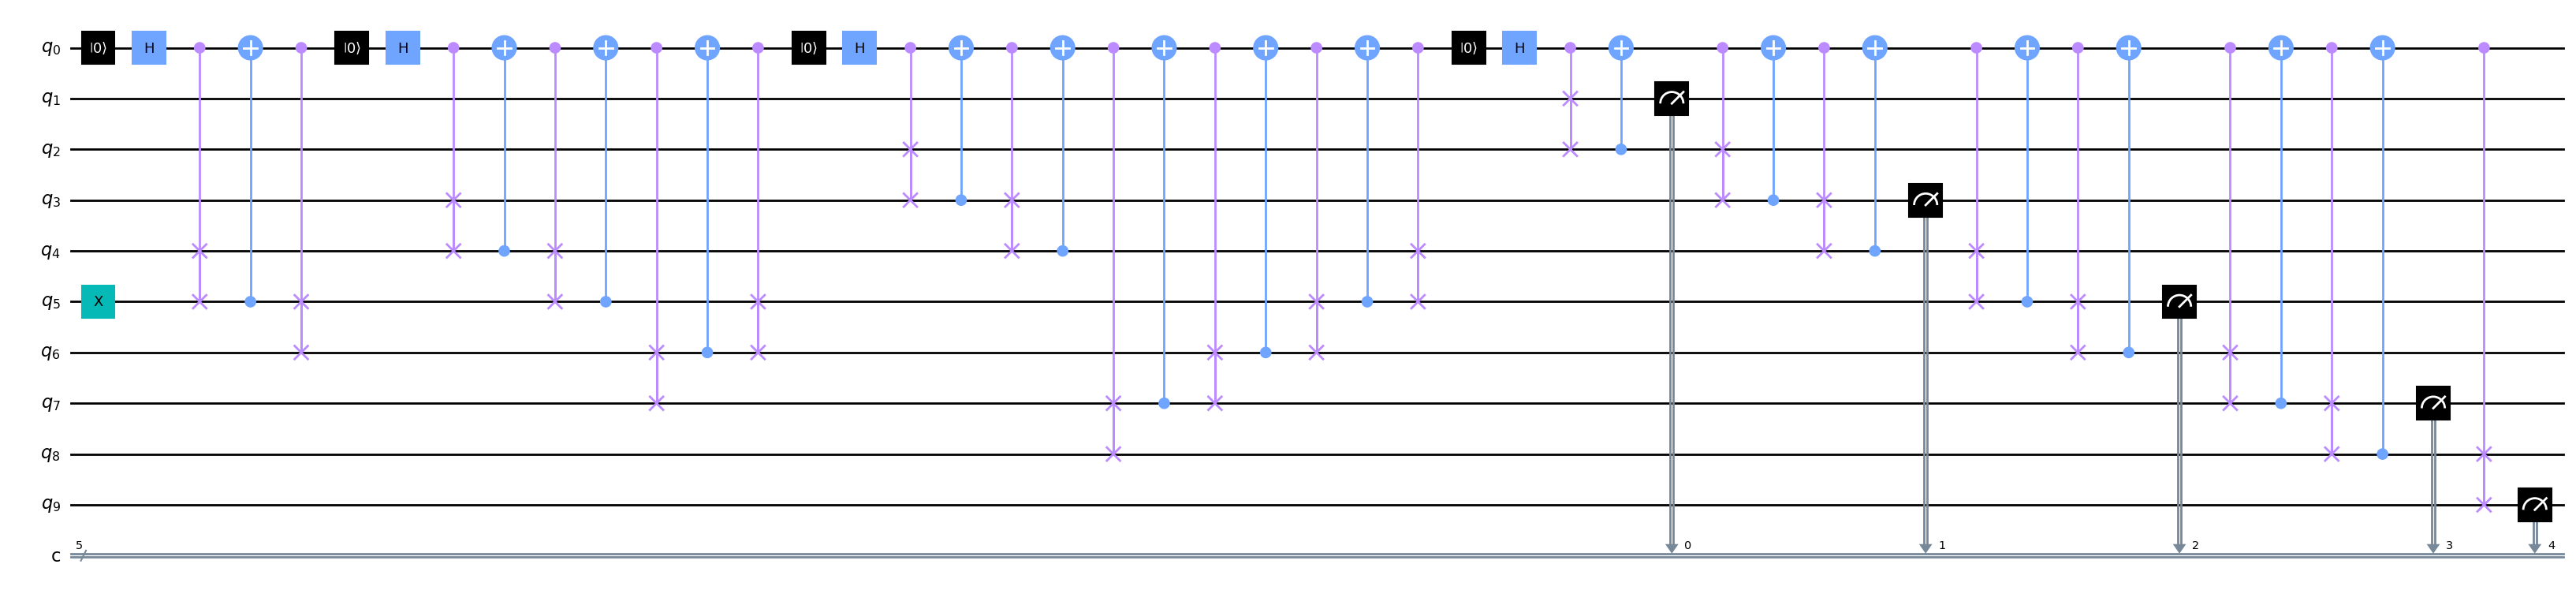

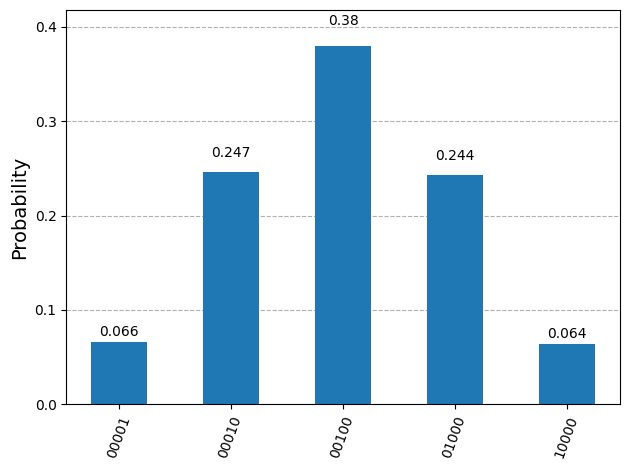

In [5]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, c)

qc.reset(q[0])
qc.x(q[5])
qc.h(q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6],q[0])
qc.cswap(q[0],q[5],q[6])
qc.cx(q[5],q[0])
qc.cswap(q[0],q[4],q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])

for i in range(0, 5):
    qc.measure(q[2*i+1], c[i])

qc.draw(output='mpl', style='clifford', fold=-1)
plt.show()

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

total_shots = sum(counts.values())
probabilities = {state: count/total_shots for state, count in counts.items()}
plot_histogram(probabilities)
plt.ylabel('Probability')
plt.show()


#### For a $n-$ level Galton Board, 

- Total number of pegs= $\frac{n(n+1)}{2}$
- Number of qubits needed= $2n + 2$
- Total measured qubits(also total measurement registers) = $n+1$
- Total gates= $4\frac{n(n+1)}{2} + n + n + n + 1 + 1 = 2n^2 + 5n + 2$

(Note: Each peg has 4 gates, there are n+1 measurement gates, 1 X gate for the ball and n each of Hadamard and reset gates)


_____

## Post-processing to obtain a smoother distribution 

#### We use the following post-processing steps to obtain a smoother distribution:

#### Block Averaging Method

1. **Data Collection**: Store all measurement bitstrings from each quantum circuit execution
2. **Encoding**: Convert unique bitstring patterns to integer labels using one-hot encoding
3. **Block Partitioning**: Divide the total shots into blocks of size $N$, creating $\frac{n_{\text{shots}}}{N}$ independent blocks
4. **Block Summation**: Calculate the sum of integer values within each block
5. **Distribution Analysis**: Generate frequency histogram of the block sums

#### Possible benefits
- **Noise Reduction**: Block averaging smooths out quantum measurement fluctuations
- **Central Limit Theorem**: Block sums approach Gaussian distributions for large block sizes

*Note: We use block size N=8 following the methodology from the reference paper.*

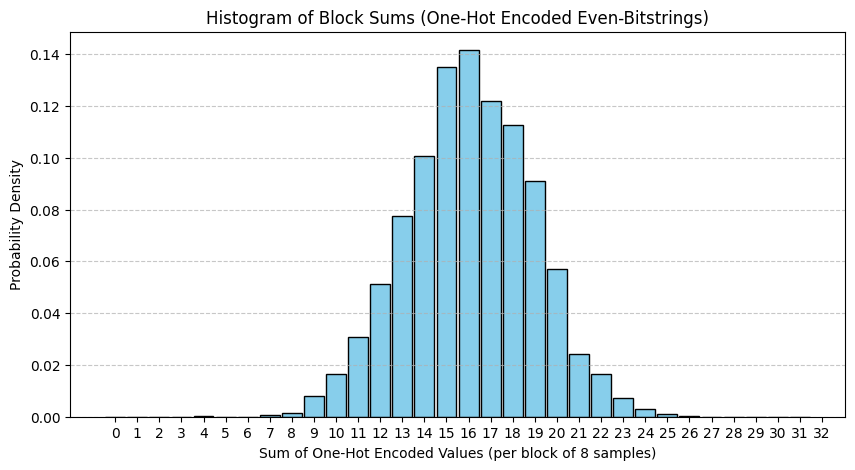

In [6]:
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=20000, memory=True)
memory = job.result().get_memory()  # to get the list of 20000 bitstrings in order of experiments/shots

unique = sorted(set(memory))
bitstring_to_int = {b: i for i, b in enumerate(unique)}

# one hot encoding to integer labels
one_hot_values = [bitstring_to_int[b] for b in memory]

# split into blocks of 8, compute sum per block (8 is the paper's choice) and note the frequency of each sum
block_size = 8
num_blocks = len(one_hot_values) // block_size
trimmed_values = one_hot_values[:num_blocks * block_size]
reshaped = np.array(trimmed_values).reshape((num_blocks, block_size))
block_sums = reshaped.sum(axis=1)

# Block sum 
plt.figure(figsize=(10, 5))
plt.hist(block_sums, bins=range(0, 33), align='left', rwidth=0.9, color='skyblue', edgecolor='black', density=True)
plt.xticks(range(0, 33))
plt.xlabel("Sum of One-Hot Encoded Values (per block of 8 samples)")
plt.ylabel("Probability Density")
plt.title("Histogram of Block Sums (One-Hot Encoded Even-Bitstrings)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

___
___